# Eigenfaces

## Introduction

Since birth, humans are trained to recognize faces in a myriad of  circumstances. When we see a human face, we can  extract all sorts of information from it. For example, the emotional state of the person, the probable health of a person, whether or not the face is familiar, etc. Facial recognition is so effortless for us that it often is seen as mundane. Differences in lighting, orientation, emotion, and distance typically do not cause any confusion or misattribution. Yet a naive computational facial recognition technique would be greatly confused. Thus we require more complicated techniques.

In this report we implement and test the Eigenfaces method of facial recognition on the Yale Faces Database. The Yale Faces Database is a collection of 165 images of human faces from 15 individuals. There are 11 images of each individual with varying facial expressions, lighting, and accessories. The Eigenfaces method uses Principle Component Analysis, to decompose a collection of vectorized images into Eigenfaces. Eigenfaces are the principle components of the image data, and are calculated by finding the eigenvectors and eigenvalues of the covariance matrix of the vectorized image data. A linear combination of Eigenfaces can approximately reconstruct any face in the original collection. The error of the approximate reconstruction along and other metrics can be used to discern actual faces from other objects, and identify faces in the original collection.

Specifically, we will use the Eigenfaces method of facial recognition to match a unique face image with a face already in the Yale Faces Databasse.

## Method 

Performing this facial recognition technique requires two steps: (1) "Training" our model on faces in the Yale Face Database. This involves performing Principle Components Analysis on the vectorized face images, and (2) Matching a novel face to the same face in the Yale Faces Database. This requires reconstructing the face from eigenfaces and finding which face has the least associated error.

## Results

### Eigenfaces
   
In order to recognize faces, we approximately reconstructed them using the Eigenfaces, and compare to which face in the training set has the lowest 

### Recognizing Familiar Faces
We also used Eigenfaces to identify familiar faces. In order to do this we used the following process on all faces in the database. We chose one face to be the test face and excluded it from training. Since there are multiple pictures of each test subject in the Yale Faces database, there was no worry of trying to identify an unfamiliar face. We trained the model on all but the one face we chose, and then projected all faces, including the test face, onto the Eigenface basis. We iterated through each projected training face and found the euclidean distance to the projected test face. The face whose projection onto the Eigenface basis was closest to the projected test face, was identified as that subject. Below are two examples, one of which is correctly identified and the other is not correctly identified.

This method of identifying familiar faces successfully identified 119 of the 165 different test faces selected. While many of the misattributions were between very similar faces, some were quite dissimilar. A possible explanation for some of the misattributions, could have to do with a difference in facial expression and orientation rather than unique face itself. It might be the case that a different face of a similar facial expression could cause the model to misattribute the subject.

## Conclusion

We also used Eigenfaces to identify familiar faces. This was done by projecting all the training images onto the Eigenface basis, and finding the closest training face to the test face projected onto the Eigenface basis. This method correctly identified 119 of the 165 faces tested.

Although these methods have become older, they still are relatively robust ways to detect faces and recognize familiar faces. 

In [6]:
from scipy.optimize import minimize
from sklearn.decomposition import PCA
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import random as r


#GENERATING EIGENFACES

#Getting Filenames
PATH = '''/Users/karlmudsam/Desktop/Eigenfaces/Yale_Faces/archive-2/'''
os.chdir(PATH)
counter = 0
files = os.listdir()
files = [i for i in files if i[:7] == 'subject']

#Loading in Files
filename_to_image = lambda x: mpimg.imread(PATH+x)
images = np.array(list(map(filename_to_image, files)))
print("All Done!")

All Done!


In [7]:
#Getting images ready for PCA
original_shape = images[0].shape
vectorize = lambda x: np.reshape(x, (1, x.shape[0]*x.shape[1]))[0]

#Vectorizing images
images = list(map(vectorize, images))

#Find mean image for use in normalization
mean_image = np.mean(images)

#Function for normalizing images
normalize = lambda x: (x - mean_image)

#Normalize images
images = list(map(normalize, images))
print("All Done!")

All Done!


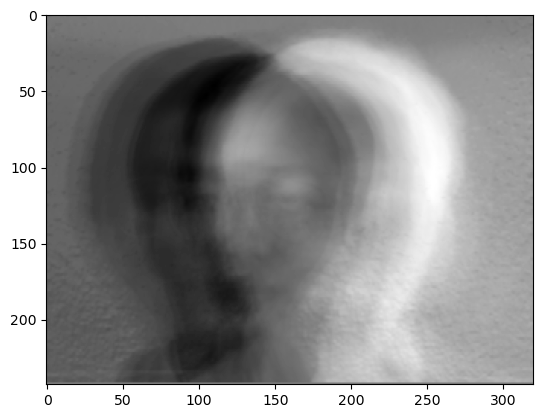

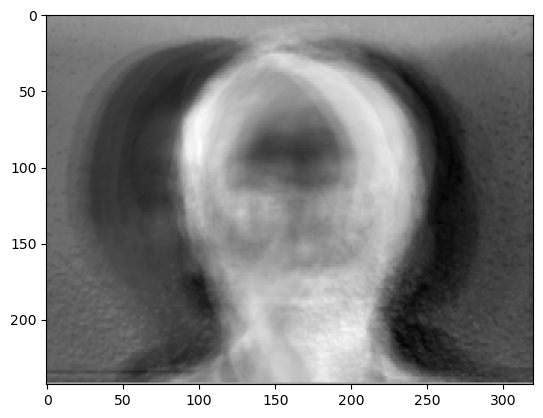

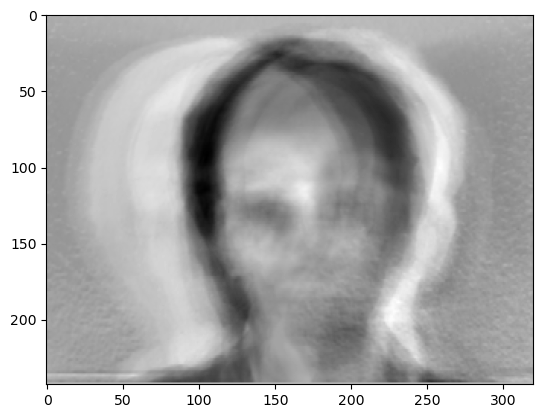

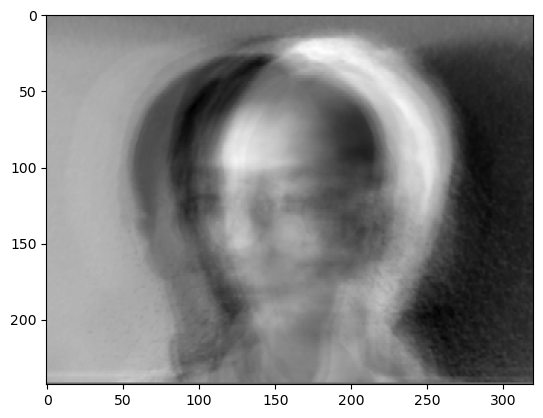

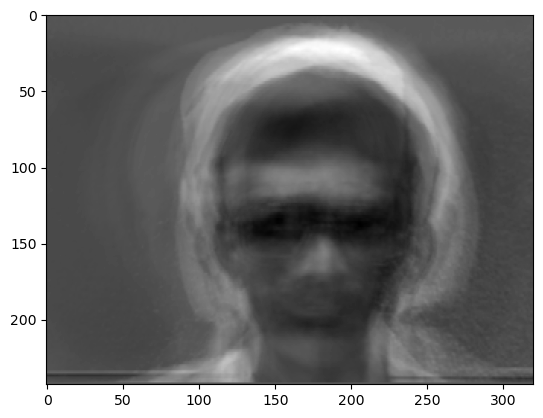

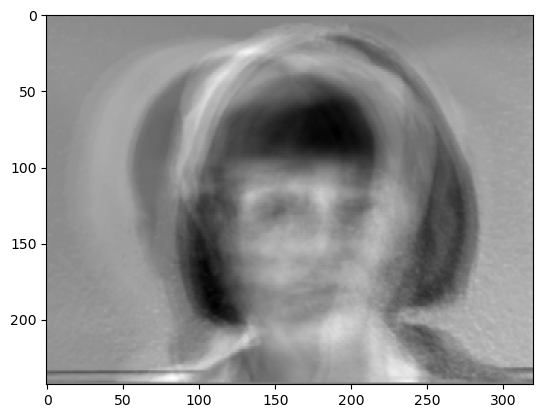

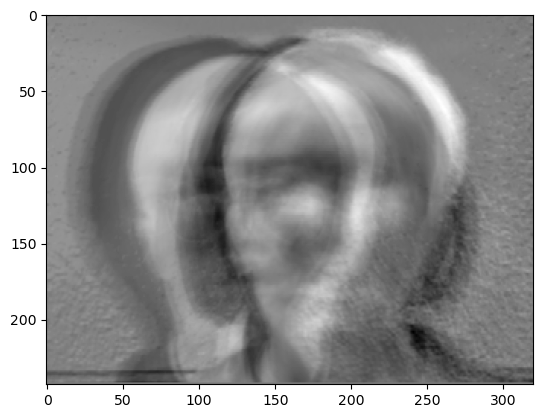

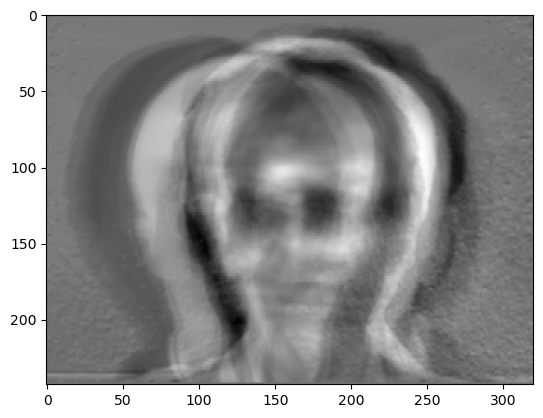

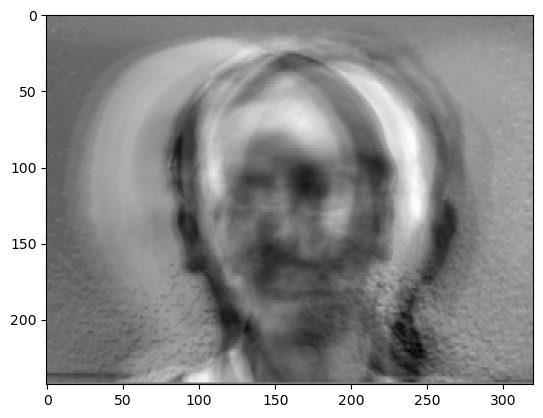

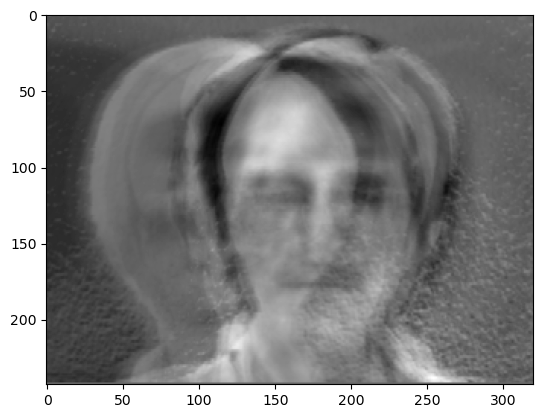

All Done!


In [8]:
#PCA
pca = PCA(10)
pca.fit(images)
components = pca.components_

#Reshaping Vectors in Images
reshape = lambda x: np.reshape(x, original_shape)
components = list(map(reshape, components))

#Display Eigenfaces
for i in range(len(components)):
    plt.imshow(components[i], cmap = "gray")
    plt.show()
    
print("All Done!")

In [28]:

#RECOGNIZING FAMILIAR FACES



def find_closest_face(file):
    '''

    Parameters
    ----------
    file : str
        A string describing the filepath of an image.

    Returns
    -------
    A boolean describing if the model successfully identified the face.
    
    Description
    -----------
    Given a filepath to an image, this function will return the filepath of the image with the closest face.

    '''
    
    #Getting all Filenames
    PATH = '''/Users/karlmudsam/Desktop/Eigenfaces/Yale_Faces/archive-2/'''
    os.chdir(PATH)
    files = os.listdir()
    files = [i for i in files if i[:7] == 'subject']
    
    #Remove test file from list of files, we don't want to train our model on data we want to test on, thats cheating!
    test_file = file
    files.remove(test_file)
    
    
    #Loading in Files
    filename_to_image = lambda x: mpimg.imread(PATH+x)
    images = list(map(filename_to_image, files))
    
    #Getting images ready for PCA (Vectorizing)
    vectorize = lambda x: np.reshape(x, (1, x.shape[0]*x.shape[1]))[0]
    images = list(map(vectorize, images))
    mean_image = np.mean(images)
    normalize = lambda x: (x - mean_image)
    images = list(map(normalize, images))
    
    #PCA
    pca = PCA(10) # PCA returning  principle components
    pca.fit(images)
    
    components = pca.components_
    
    #Calculating Weights for each image
    def calc_weights(L):
        weights = []
        for u in components:
            weights.append(np.dot(u, L))
        weights = np.array(weights)
        L = np.array(L)
        return(weights)
    
    weight_vectors = list(map(calc_weights, images))
    
    #Clean Test Image
    test_image = mpimg.imread(PATH+test_file)
    test_image = vectorize(test_image)
    test_image = test_image - mean_image
    
    #Calculating Weights for Test Image
    test_image_weights = []
    for u in components:
        test_image_weights.append(np.dot(u, test_image))
    
    #Finding the error between the image and the reconstructed image
    image_to_error = lambda x: np.linalg.norm(np.array(x)-np.array(test_image_weights), 2)
    error_list = list(map(image_to_error, weight_vectors))
    lowest_error = min(list(error_list))
    
    #Finding index of face with least error
    index_of_least_error_img = error_list.index(lowest_error)
    closest_face = images[index_of_least_error_img]
    
    is_success = test_file[:9] == files[index_of_least_error_img][:9]
    
    global success_counter
    global failure_counter
    
    
    #Transforming vectorized face image into an image form
    if(is_success and (success_counter < 3)):
        reshape = lambda x: np.reshape(x, (243, 320))
        closest_face = reshape(closest_face)
        test_image = reshape(test_image)
        plt.imshow(closest_face, cmap='gray')
        plt.show()
        plt.imshow(test_image, cmap='gray')
        plt.show()
        
        success_counter = success_counter + 1

        print(test_file)
        print(files[index_of_least_error_img])
        
    if(not(is_success) and (failure_counter < 3)):
        reshape = lambda x: np.reshape(x, (243, 320))
        closest_face = reshape(closest_face)
        test_image = reshape(test_image)
        plt.imshow(closest_face, cmap='gray')
        plt.show()
        plt.imshow(test_image, cmap='gray')
        plt.show()
        
        failure_counter = failure_counter + 1

        print(test_file)
        print(files[index_of_least_error_img])
        
    return(is_success)

print("All Done!")

All Done!


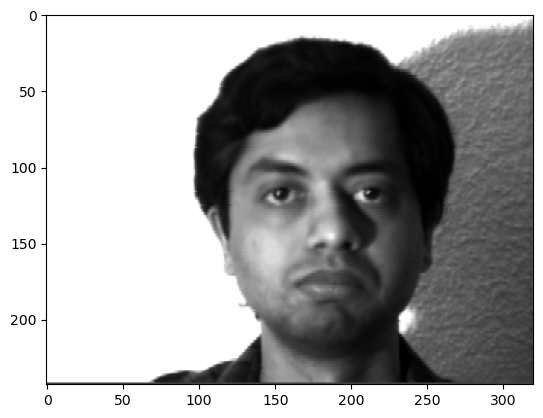

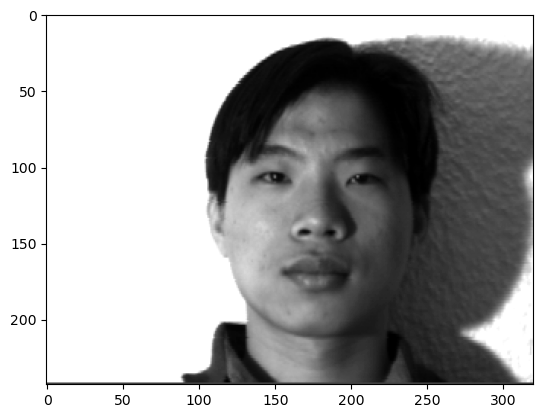

subject04.leftlight
subject10.leftlight


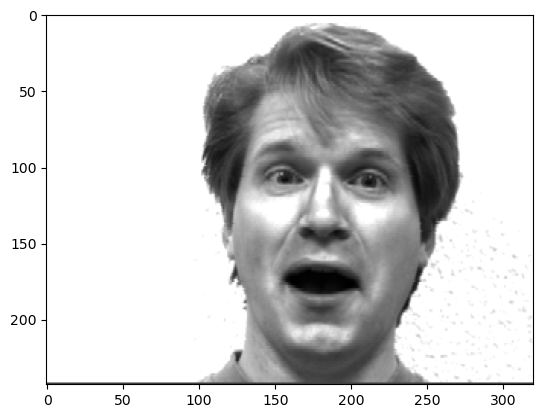

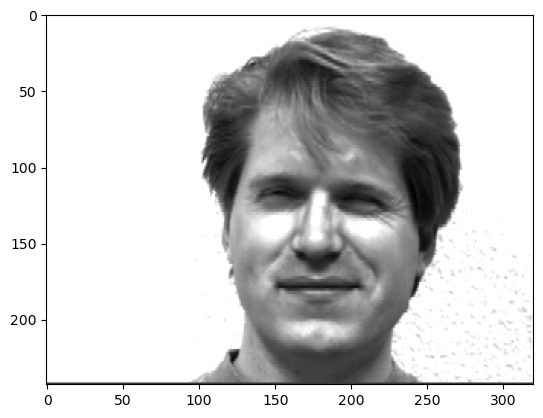

subject01.wink
subject01.surprised


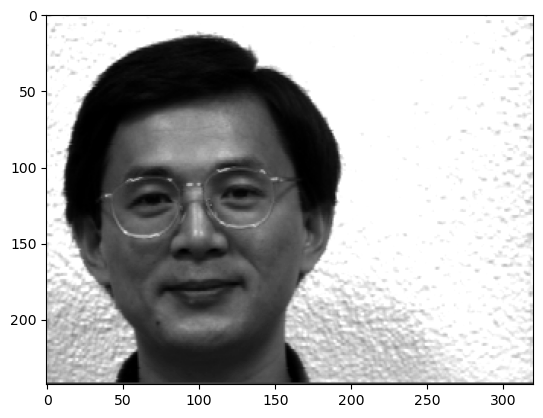

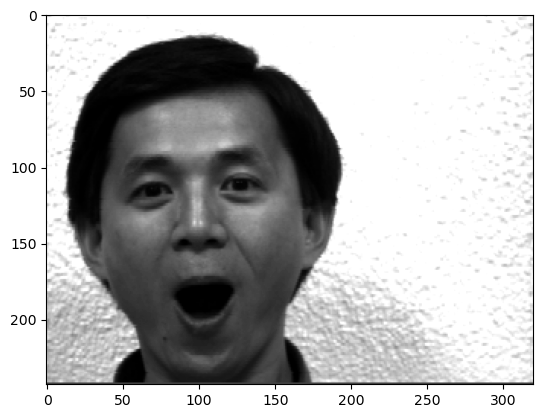

subject06.surprised
subject06.glasses


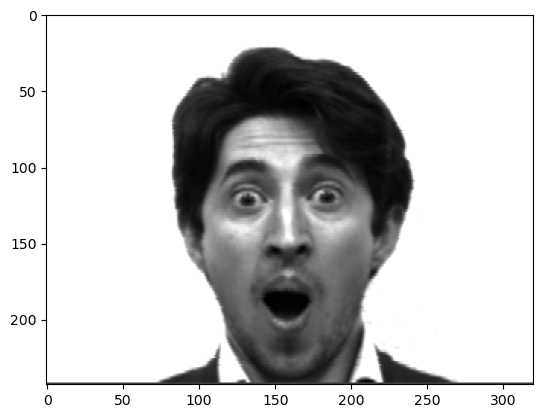

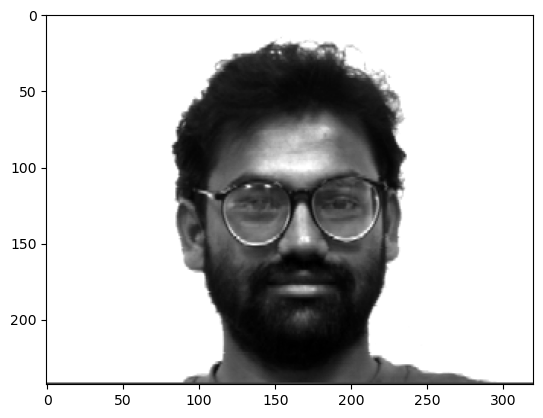

subject07.glasses
subject03.surprised


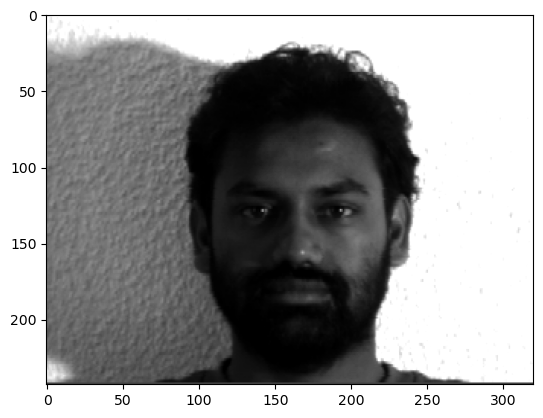

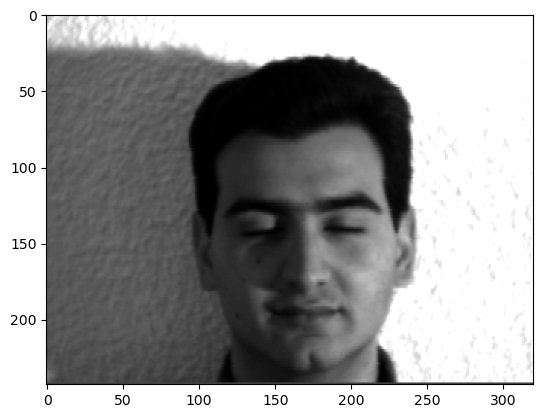

subject15.rightlight
subject07.rightlight


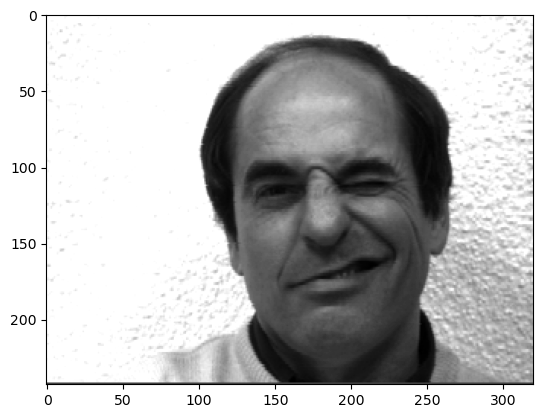

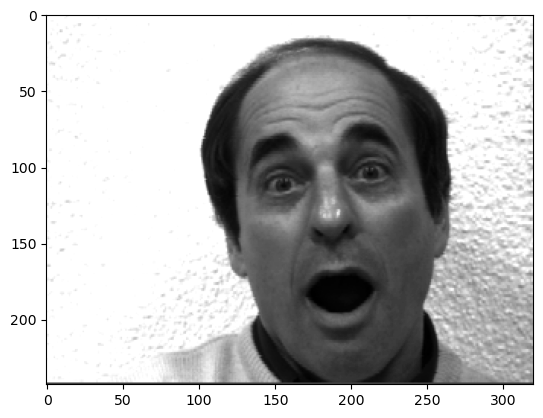

subject12.surprised
subject12.wink
Number of Success: 119 
 Number of Total Faces: 165 
 Precent Success: 0.7212121212121212
All Done!


In [29]:
success = 0
success_counter = 0
failure_counter = 0
for file in files:
    success = success + int(find_closest_face(file))
    
print("Number of Success:", success, "\n Number of Total Faces:", len(files), "\n Precent Success:", success/len(files))
print("All Done!")